In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import auc, roc_curve, roc_auc_score


In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
y = data['SalePrice']
X = data.drop(columns = ['SalePrice', 'Alley'])

In [8]:
Select_Data = X.drop(columns = ['LotConfig', 'LandSlope', 'Neighborhood',
                                'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                                 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                                 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                                 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                                 'GarageCond', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
                                'Street', 'GarageYrBlt', 'LotFrontage', 'LotArea', 'MasVnrArea', 'MasVnrArea'], axis = 1)



X = pd.get_dummies(Select_Data, columns = ['MSZoning',  'LotShape', 'LandContour', 'Utilities'
                                ])




In [9]:
# X = data[['MSSubClass','LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']]

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Id                1460 non-null   int64
 1   MSSubClass        1460 non-null   int64
 2   OverallQual       1460 non-null   int64
 3   OverallCond       1460 non-null   int64
 4   YearBuilt         1460 non-null   int64
 5   YearRemodAdd      1460 non-null   int64
 6   BsmtFinSF1        1460 non-null   int64
 7   BsmtFinSF2        1460 non-null   int64
 8   BsmtUnfSF         1460 non-null   int64
 9   TotalBsmtSF       1460 non-null   int64
 10  1stFlrSF          1460 non-null   int64
 11  2ndFlrSF          1460 non-null   int64
 12  LowQualFinSF      1460 non-null   int64
 13  GrLivArea         1460 non-null   int64
 14  BsmtFullBath      1460 non-null   int64
 15  BsmtHalfBath      1460 non-null   int64
 16  FullBath          1460 non-null   int64
 17  HalfBath          1460 non-null  

In [11]:
X.dropna(axis = 0)

,Id,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa
0,1,60,7,5,2003,2003,706,0,150,856,...,0,0,0,1,0,0,0,1,1,0
1,2,20,6,8,1976,1976,978,0,284,1262,...,0,0,0,1,0,0,0,1,1,0
2,3,60,7,5,2001,2002,486,0,434,920,...,1,0,0,0,0,0,0,1,1,0
3,4,70,7,5,1915,1970,216,0,540,756,...,1,0,0,0,0,0,0,1,1,0
4,5,60,8,5,2000,2000,655,0,490,1145,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,6,5,1999,2000,0,0,953,953,...,0,0,0,1,0,0,0,1,1,0
1456,1457,20,6,6,1978,1988,790,163,589,1542,...,0,0,0,1,0,0,0,1,1,0
1457,1458,70,7,9,1941,2006,275,0,877,1152,...,0,0,0,1,0,0,0,1,1,0
1458,1459,20,5,6,1950,1996,49,1029,0,1078,...,0,0,0,1,0,0,0,1,1,0


In [12]:
X.describe()

,Id,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,0.331507,0.028082,0.006849,0.633562,0.043151,0.034247,0.024658,0.897945,0.999315,0.000685
std,421.610009,42.300571,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,0.470916,0.165264,0.082505,0.481996,0.203266,0.181924,0.155132,0.302824,0.026171,0.026171
min,1.000000,20.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,730.500000,50.000000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1095.250000,70.000000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1460.000000,190.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#Приводим данные к единой размерности
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X))

X



,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-1.730865,0.073375,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,-0.459303,...,-0.704203,-0.169981,-0.083045,0.760512,-0.21236,-0.188311,-0.159,0.337126,0.02618,-0.02618
1,-1.728492,-0.872563,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,0.466465,...,-0.704203,-0.169981,-0.083045,0.760512,-0.21236,-0.188311,-0.159,0.337126,0.02618,-0.02618
2,-1.726120,0.073375,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,-0.313369,...,1.420045,-0.169981,-0.083045,-1.314904,-0.21236,-0.188311,-0.159,0.337126,0.02618,-0.02618
3,-1.723747,0.309859,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,-0.687324,...,1.420045,-0.169981,-0.083045,-1.314904,-0.21236,-0.188311,-0.159,0.337126,0.02618,-0.02618
4,-1.721374,0.073375,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,0.199680,...,1.420045,-0.169981,-0.083045,-1.314904,-0.21236,-0.188311,-0.159,0.337126,0.02618,-0.02618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.071836,-0.517200,0.918511,0.733308,-0.973018,-0.288653,0.873321,-0.238122,...,-0.704203,-0.169981,-0.083045,0.760512,-0.21236,-0.188311,-0.159,0.337126,0.02618,-0.02618
1456,1.723747,-0.872563,-0.071836,0.381743,0.222975,0.151865,0.759659,0.722112,0.049262,1.104925,...,-0.704203,-0.169981,-0.083045,0.760512,-0.21236,-0.188311,-0.159,0.337126,0.02618,-0.02618
1457,1.726120,0.309859,0.651479,3.078570,-1.002492,1.024029,-0.369871,-0.288653,0.701265,0.215641,...,-0.704203,-0.169981,-0.083045,0.760512,-0.21236,-0.188311,-0.159,0.337126,0.02618,-0.02618
1458,1.728492,-0.872563,-0.795151,0.381743,-0.704406,0.539493,-0.865548,6.092188,-1.284176,0.046905,...,-0.704203,-0.169981,-0.083045,0.760512,-0.21236,-0.188311,-0.159,0.337126,0.02618,-0.02618


In [14]:
#Приводим данные к единой размерности
from sklearn.preprocessing import StandardScaler

In [15]:
# Поделим на train и тест
from sklearn.model_selection import train_test_split

In [16]:
mX_train, mX_test, my_train, my_test = train_test_split(X, y, test_size=0.3)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
clf_rf = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
clf_rf.fit(mX_train, my_train)   

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [19]:
y_pred_test_rf = clf_rf.predict_proba(mX_test)[:, 1]
y_pred_train_rf = clf_rf.predict_proba(mX_train)[:, 1]

In [20]:
imp = pd.Series(clf_rf.feature_importances_)
imp.sort_values(ascending=False).head()

9     0.125904
0     0.106696
23    0.099010
13    0.091202
4     0.082691
dtype: float64

In [21]:
from sklearn.model_selection import StratifiedKFold

In [22]:
cv = StratifiedKFold(n_splits=10)

In [23]:
def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float) 
    meta_test = np.zeros(X_test.shape[0], dtype=float) 
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)): 
        
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[test_ind] = clf.predict(X_train.iloc[test_ind])
        meta_test += clf.predict(X_test)
    
    return meta_train, meta_test / stack_cv.n_splits

In [24]:
from sklearn.linear_model import Lasso
lin_reg = Lasso()

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {'alpha': [0.01, 0.05, 0.1, 0.5, 1.]}
lasso_grid = GridSearchCV(lin_reg, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [27]:
lasso_grid.fit(mX_train, my_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11438746464.438965, tolerance: 696137853.4566075
  positive)


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
lasso_grit_best = lasso_grid.best_estimator_
y_pred_lasso = lasso_grit_best.predict(mX_test)
lin_mse = mean_squared_error(my_test, y_pred_lasso)
rmse_lasso = np.sqrt(lin_mse)
rmse_lasso

29537.872331697297

In [30]:
clf_rf_best = lasso_grid.best_estimator_
y_pred_rf = clf_rf_best.predict(mX_test)
lin_mse = mean_squared_error(my_test, y_pred_rf)
rmse_rf = np.sqrt(lin_mse)
rmse_rf


29537.872331697297

^C


In [33]:
import xgboost as xgb

In [34]:
xgb_model_2 = xgb.XGBRegressor(n_estimators=30, n_jobs=-1)

In [38]:
max_depth = [2, 5, 7, 9]
colsample_bytree = [0.3, 0.6, 0.9, 1]
subsample = [0.3, 0.6, 0.9, 1]
gamma = [0, 0.3, 0.6, 0.8, 1]
alpha = [0, 0.3, 0.6, 0.9]
lamba = [0.1, 0.3, 0.6, 0.8, 1]

params = {
    'max_depth' : max_depth,
    'colsample_bytree' : colsample_bytree,
    'subsample' : subsample,
    'gamma' : gamma,
    'reg_alpha' : alpha,
    'reg_lambda' : lamba
}

gr_xgb = GridSearchCV(xgb_model_2, params, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')
xgb_model = gr_xgb.fit(mX_train, my_train)

xgb_model.best_params_

# 'colsample_bytree': 1,
# 'gamma': 0,
# 'max_depth': 5,
# 'reg_alpha': 0.6,
# 'reg_lambda': 0.1,
# 'subsample': 0.9

{'colsample_bytree': 0.6,
 'gamma': 0,
 'max_depth': 5,
 'reg_alpha': 0,
 'reg_lambda': 0.1,
 'subsample': 0.9}

In [41]:
xgb_model_3 = xgb.XGBRegressor(colsample_bytree=1, gamma=0, reg_alpha=0.6, reg_lambda=0.1,
                                   subsample=0.9, n_jobs=-1, n_estimators=5000, learning_rate=0.1)


learning_rate = [0.005, 0.007, 0.01]

fit_params={"early_stopping_rounds":50, 
            "eval_metric" : "rmse", 
            "eval_set" : [[mX_train, my_train]]}

params = {
    'learning_rate' : learning_rate
}

gr_xgb_ = GridSearchCV(xgb_model_3, params,  n_jobs=-1, cv=10, 
                       scoring='neg_mean_squared_error')

gr_xgb_.fit(mX_train, my_train)

xgb_best = gr_xgb_.best_estimator_
print (xgb_best.best_ntree_limit)
print (gr_xgb_.best_params_)

# >>> 5000
# >>> {'learning_rate': 0.01}

5000
{'learning_rate': 0.005}


In [42]:
xgb_model_final = xgb.XGBRegressor(colsample_bytree=1, gamma=0, max_depth=5, reg_alpha=0.6, reg_lambda=0.1,
                                   subsample=0.9, n_jobs=-1, n_estimators=5000, learning_rate=0.01)
xgb_model_final.fit(mX_train, my_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0.6,
             reg_lambda=0.1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_pred_xgb = xgb_model_final.predict(mX_test)
rmse_xgb = np.sqrt(mean_squared_error(my_test, y_pred_xgb))
rmse_xgb

23800.94328769793

In [44]:
all_models = [lasso_grit_best, clf_rf_best, xgb_model_final]
meta_train = []
meta_test = []
for i in all_models:
    meta_tr, meta_te = get_meta_features(i, mX_train, my_train, mX_test, cv)
    meta_train.append(meta_tr)
    meta_test.append(meta_te)

    
col_names = ['lasso_model', 'rf_model', 'xgb_model']
X_train_meta = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_test_meta = pd.DataFrame(np.stack(meta_test,axis=1), columns=col_names)
X_train_meta.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 993344949.6152344, tolerance: 611708001.979727
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13431722573.194702, tolerance: 633115736.7606611
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12375790244.845459, tolerance: 642560

,lasso_model,rf_model,xgb_model
0,155898.323862,155898.323862,140676.625000
1,203064.025243,203064.025243,194218.671875
2,228708.405381,228708.405381,194476.656250


In [45]:
from sklearn.linear_model import LinearRegression
clf_lr_meta = LinearRegression(n_jobs=-1)
clf_lr_meta.fit(X_train_meta, my_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [46]:
yl_pred_meta_test = clf_lr_meta.predict(X_test_meta)
lin_mse = mean_squared_error(my_test, yl_pred_meta_test)
rmse_stack = np.sqrt(lin_mse)
rmse_stack

24304.77498306559

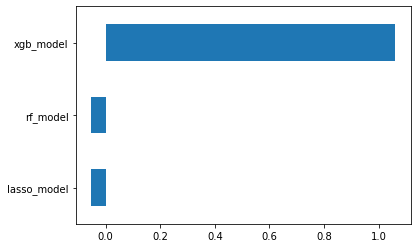

In [47]:
pd.Series(clf_lr_meta.coef_.flatten(), index=X_train_meta.columns).plot(kind='barh')

In [48]:
print ('Результат lasso_reg',rmse_lasso)
print ('Результат Lasso RandomForest',rmse_rf)
print ('Результат XGBoost',rmse_xgb)
print ('Результат stacking',rmse_stack)

Результат lasso_reg 29537.872331697297
Результат Lasso RandomForest 29537.872331697297
Результат XGBoost 23800.94328769793
Результат stacking 24304.77498306559
